In [1]:
import pandas as pd
df=pd.read_csv("IMDB-Movie-Data.csv")

In [2]:
z=df.iloc[:,[1,2,9,8]]

In [3]:
import re
genres=z['Genre']
category=[]
for i in genres:
    m=i.split(',')
    category.append(m[0])
a=pd.DataFrame(category)
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc.fit(a[0])
a[0]=enc.transform(a[0])
a=a.rename(columns={0:"Categories"})
a.Categories.unique()
a.to_csv('genres.csv',index=False)

In [4]:
z=z.join(a)
z

,Title,Genre,Votes,Rating,Categories
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",757074,8.1,0
1,Prometheus,"Adventure,Mystery,Sci-Fi",485820,7.0,1
2,Split,"Horror,Thriller",157606,7.3,8
3,Sing,"Animation,Comedy,Family",60545,7.2,2
4,Suicide Squad,"Action,Adventure,Fantasy",393727,6.2,0
5,The Great Wall,"Action,Adventure,Fantasy",56036,6.1,0
6,La La Land,"Comedy,Drama,Music",258682,8.3,4
7,Mindhorn,Comedy,2490,6.4,4
8,The Lost City of Z,"Action,Adventure,Biography",7188,7.1,0
9,Passengers,"Adventure,Drama,Romance",192177,7.0,1


In [5]:
import matplotlib.pyplot as p
cn=z.groupby('Categories').size()
c=z.Categories.unique()
p.bar(c,cn)

<BarContainer object of 13 artists>

In [6]:
x=z.iloc[:,[2,3]].values

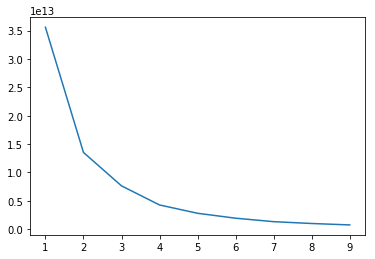

In [7]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as p
a=[]
for i in range(1,10):
    k=KMeans(n_clusters=i)
    k.fit(x)
    a.append(k.inertia_)
p.plot(range(1,10),a)
p.show()

In [8]:
m=KMeans(n_clusters=4,random_state=0)
y=m.fit_predict(x)

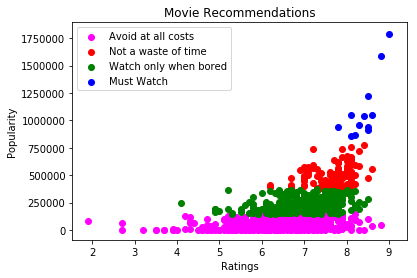

In [9]:
p.xlabel("Ratings")
p.ylabel("Popularity")
p.title("Movie Recommendations")
p.scatter(x[y==0,1],x[y==0,0],color='magenta',label='Avoid at all costs')
p.scatter(x[y==1,1],x[y==1,0],color='red',label='Not a waste of time')
p.scatter(x[y==2,1],x[y==2,0],color='green',label='Watch only when bored')
p.scatter(x[y==3,1],x[y==3,0],color='blue',label='Must Watch')
p.legend()
p.show()

In [10]:
x1=z.iloc[:,[3,4]].values
y1=z.iloc[:,0].values

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf=RandomForestClassifier(n_estimators=1000)

In [13]:
rf.fit(x1,y1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
gen={'Action':0,'Adventure':1,'Animation':2,'Biography':3,
     'Comedy':4,'Crime':5,'Drama':6,'Fantasy':7,
     'Horror':8,'Mystery':9,'Romance':10,
     'Sci-fi':11,'Thriller':12}
print("Enter the genre of your choice:")
for k,v in gen.items():
    print(k)    

Enter the genre of your choice:
Action
Adventure
Animation
Biography
Comedy
Crime
Drama
Fantasy
Horror
Mystery
Romance
Sci-fi
Thriller


In [15]:
g=input(":")

:Action


In [16]:
try:
    genre=gen[g]
except:
    g=input("Re-enter the genre:")
    genre=gen[g]
ratings=9.0
count=0
print("Recommended movies:")
while ratings>6 and count<=3:
    print(rf.predict([[ratings,genre]]))
    ratings-=1
    count+=1
        

Recommended movies:
['The Dark Knight']
['Deadpool']
['Jack Reacher']
